<a href="https://colab.research.google.com/github/prksh830/Healthcare/blob/main/RUL_BATTERY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load data
fname = "Battery_RUL.csv"
df = pd.read_csv(fname)

# Basic counts
n_rows, n_cols = df.shape

# Numeric columns
num_df = df.select_dtypes(include=[np.number]).copy()

# Descriptive statistics (original)
describe_orig = num_df.describe().T
missing_orig = num_df.isna().sum().rename('missing_count').to_frame()
stats_orig = describe_orig.join(missing_orig)

# IQR outlier bounds per column
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Keep rows within bounds across all numeric columns
within_bounds = num_df.ge(lower, axis=1) & num_df.le(upper, axis=1)
rows_keep_mask = within_bounds.all(axis=1)

# Filtered data
df_clean = df.loc[rows_keep_mask].copy()
num_df_clean = num_df.loc[rows_keep_mask].copy()

# Counts after filtering
n_rows_clean = len(df_clean)
removed = n_rows - n_rows_clean

# Descriptive statistics (cleaned)
describe_clean = num_df_clean.describe().T
missing_clean = num_df_clean.isna().sum().rename('missing_count').to_frame()
stats_clean = describe_clean.join(missing_clean)

# Save outputs as CSV
stats_orig.to_csv("original_descriptive_stats.csv")
stats_clean.to_csv("cleaned_descriptive_stats.csv")
summary = pd.DataFrame({
    "metric": ["total_rows_original",
               "total_rows_after_outlier_removal",
               "rows_removed_as_outliers"],
    "value": [n_rows, n_rows_clean, removed]
})
summary.to_csv("summary_counts.csv", index=False)

# Optional: print concise summary
print(summary.to_csv(index=False))

metric,value
total_rows_original,15064
total_rows_after_outlier_removal,14445
rows_removed_as_outliers,619



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation map before outlier removal
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Before Outlier Removal)")
plt.savefig("correlation_before.tiff", dpi=300, format="tiff")
plt.close()

# Correlation map after outlier removal
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (After Outlier Removal)")
plt.savefig("correlation_after.tiff", dpi=300, format="tiff")
plt.close()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation map before outlier removal
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Before Outlier Removal)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("correlation_before.tiff", dpi=300, format="tiff")
plt.close()

# Correlation map after outlier removal
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (After Outlier Removal)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("correlation_after.tiff", dpi=300, format="tiff")
plt.close()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: load dataset
df = pd.read_csv("Battery_RUL.csv")

# 1. Histogram / KDE plot for all numeric features
df.hist(figsize=(15,10), bins=30)
plt.suptitle("Histogram of Features", fontsize=16)
plt.tight_layout()
plt.savefig("histograms.tiff", dpi=300, format="tiff")
plt.close()

# 2. Boxplot for numeric features
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("boxplots.tiff", dpi=300, format="tiff")
plt.close()

# 3. Violin plot for first 5 numeric features (to avoid clutter)
plt.figure(figsize=(12,6))
sns.violinplot(data=df.iloc[:, :5])
plt.title("Violin Plots of First 5 Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("violin_plots.tiff", dpi=300, format="tiff")
plt.close()

# 4. Pairplot (Scatter Matrix) - subset to first 4 features
sns.pairplot(df.iloc[:, :4])
plt.savefig("pairplot.tiff", dpi=300, format="tiff")
plt.close()

# 5. Count plot for categorical features (if any)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(f"countplot_{col}.tiff", dpi=300, format="tiff")
    plt.close()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------
# Boxplots for Original Dataset
# ------------------------
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} (Original Data)")
    plt.tight_layout()
    plt.savefig(f"boxplot_original_{col}.tiff", dpi=300, format="tiff")
    plt.close()

# ------------------------
# Boxplots for Cleaned Dataset
# ------------------------
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_clean[col])
    plt.title(f"Boxplot of {col} (Cleaned Data)")
    plt.tight_layout()
    plt.savefig(f"boxplot_cleaned_{col}.tiff", dpi=300, format="tiff")
    plt.close()

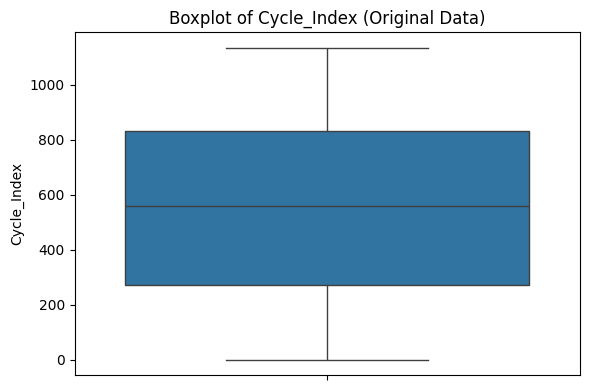

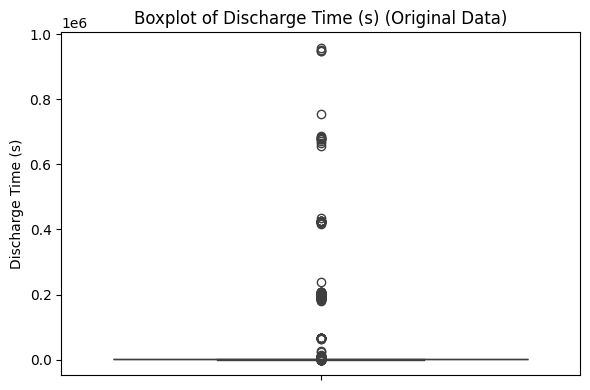

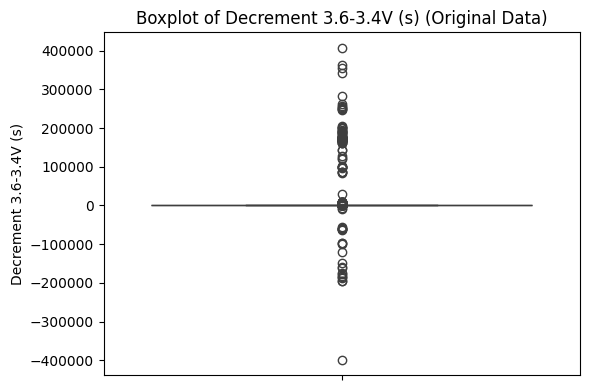

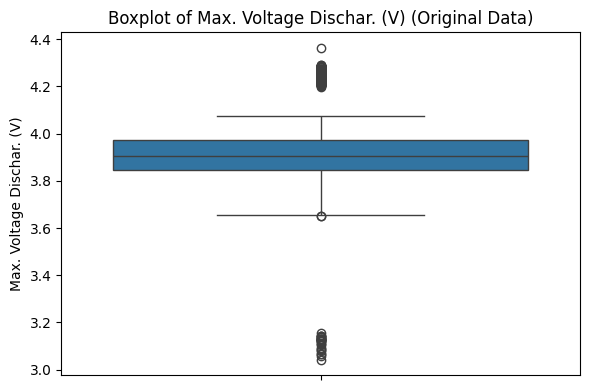

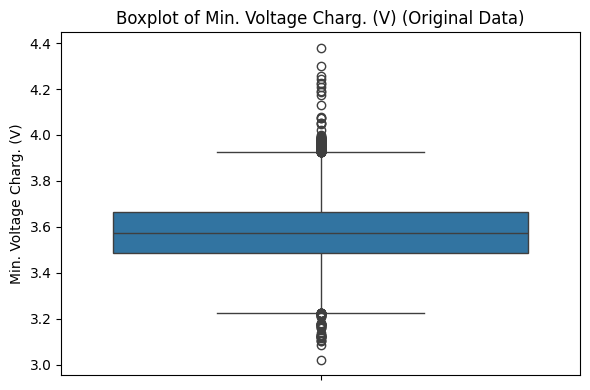

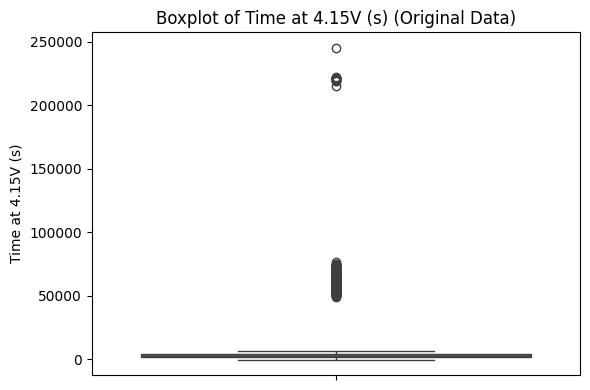

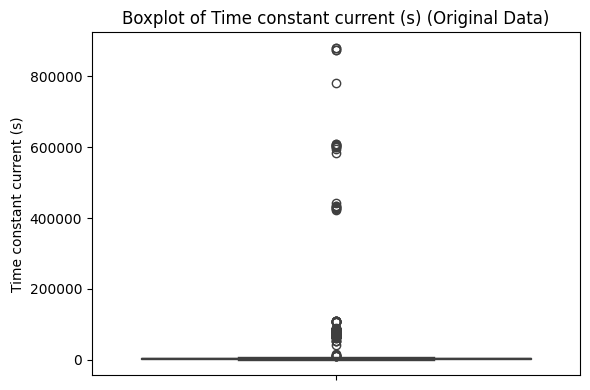

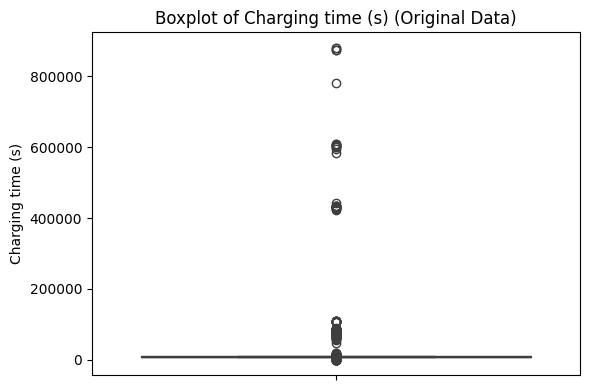

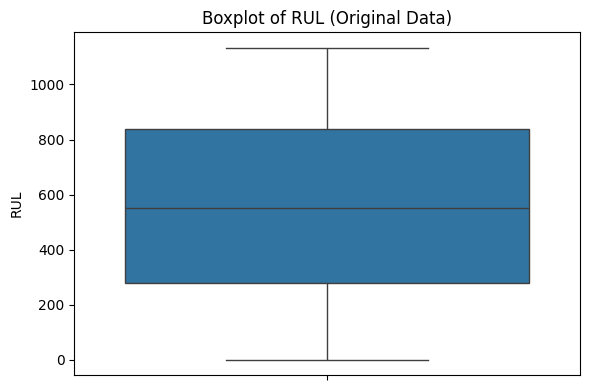

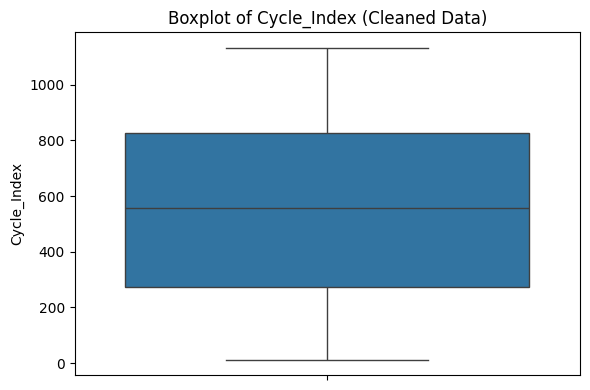

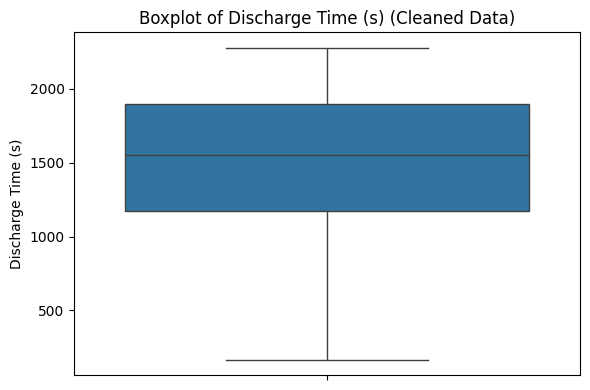

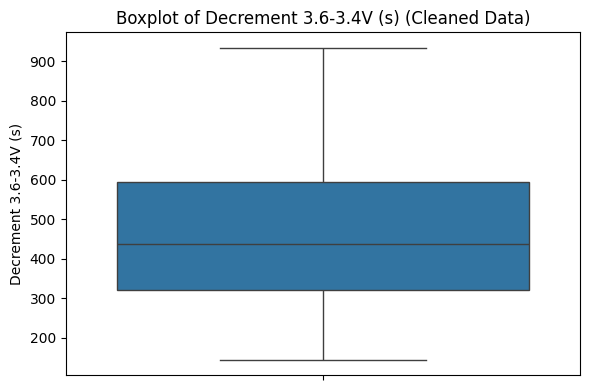

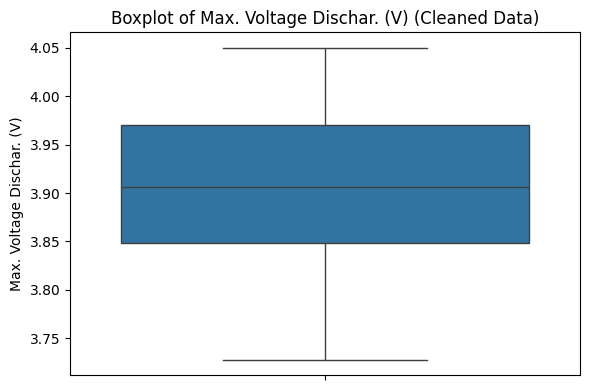

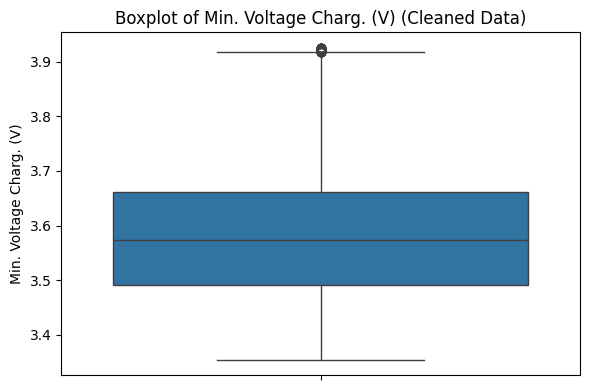

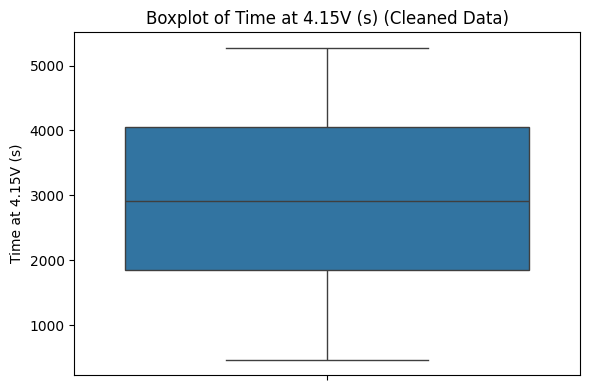

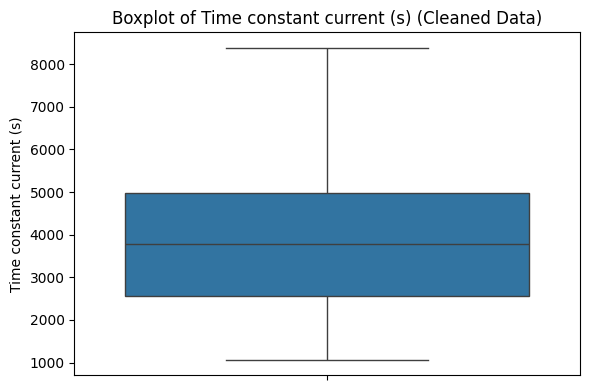

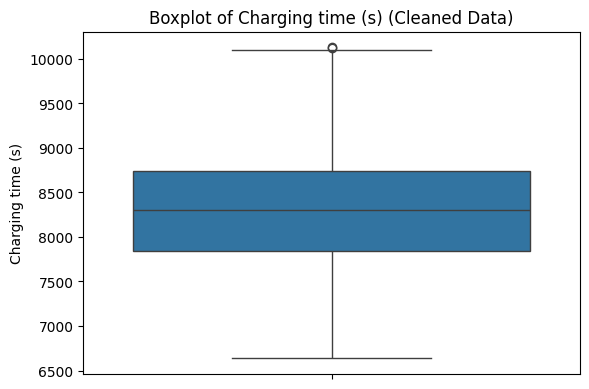

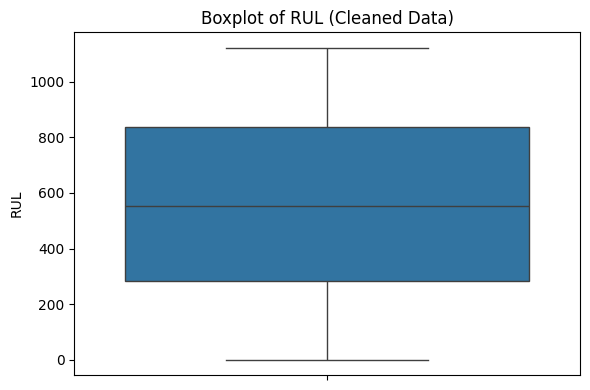

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------
# Boxplots for Original Dataset
# ------------------------
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} (Original Data)")
    plt.tight_layout()
    plt.show()   # Display inline in Colab
    # If you want to save also:
    # plt.savefig(f"boxplot_original_{col}.tiff", dpi=300, format="tiff")
    plt.close()

# ------------------------
# Boxplots for Cleaned Dataset
# ------------------------
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_clean[col])
    plt.title(f"Boxplot of {col} (Cleaned Data)")
    plt.tight_layout()
    plt.show()   # Display inline in Colab
    # If you want to save also:
    # plt.savefig(f"boxplot_cleaned_{col}.tiff", dpi=300, format="tiff")
    plt.close()

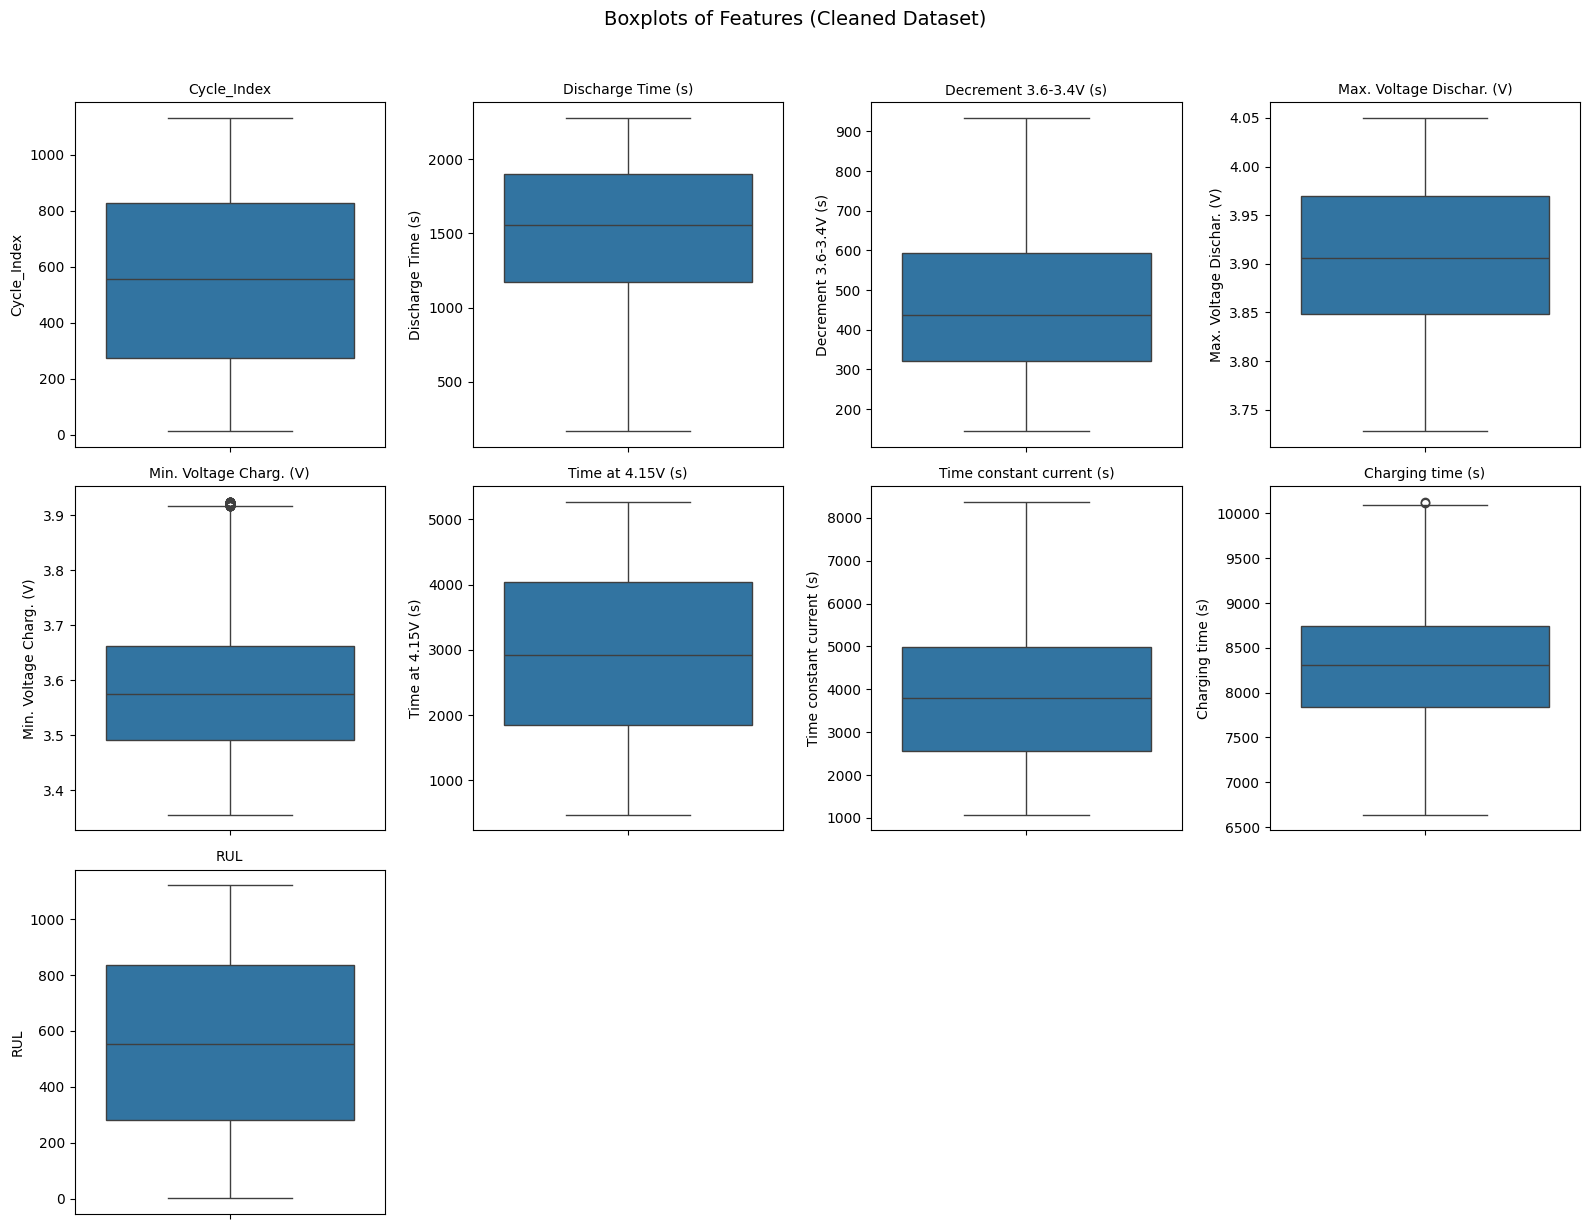

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Select only numeric features
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Grid size (auto based on number of features)
n_cols = 4  # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_clean[col], ax=axes[i])
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots of Features (Cleaned Dataset)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Compute IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find features with outliers
outlier_features = []
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).sum()
    if outliers > 0:
        outlier_features.append((col, outliers))

# Print results
print("Features containing outliers and their counts:")
for feature, count in outlier_features:
    print(f"{feature}: {count} outliers")

Features containing outliers and their counts:
Discharge Time (s): 322 outliers
Decrement 3.6-3.4V (s): 285 outliers
Max. Voltage Dischar. (V): 256 outliers
Min. Voltage Charg. (V): 245 outliers
Time at 4.15V (s): 167 outliers
Time constant current (s): 189 outliers
Charging time (s): 445 outliers


Random Forest Feature Importances:
                     Feature  Importance
4          Time at 4.15V (s)    0.400422
5  Time constant current (s)    0.360854
0         Discharge Time (s)    0.202865
1     Decrement 3.6-3.4V (s)    0.018648
2  Max. Voltage Dischar. (V)    0.008268
6          Charging time (s)    0.005599
3    Min. Voltage Charg. (V)    0.003344


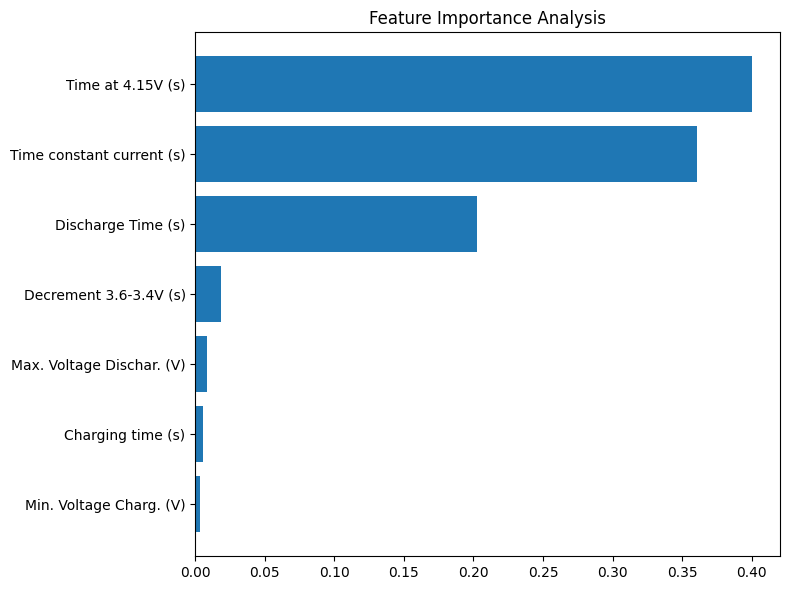

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# ------------------------
# 1. Define RUL target
# ------------------------
# Assume df_clean is your cleaned dataset
EOL = df_clean["Cycle_Index"].max()   # End-of-life cycle
df_clean["RUL"] = EOL - df_clean["Cycle_Index"]

# ------------------------
# 2. Select features (excluding Cycle_Index itself to avoid trivial prediction)
# ------------------------
features = [
    "Discharge Time (s)",
    "Decrement 3.6-3.4V (s)",
    "Max. Voltage Dischar. (V)",
    "Min. Voltage Charg. (V)",
    "Time at 4.15V (s)",
    "Time constant current (s)",
    "Charging time (s)"
]
X = df_clean[features]
y = df_clean["RUL"]

# ------------------------
# 3. Train/Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------
# 4. Train Random Forest
# ------------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# ------------------------
# 5. Feature Importance (Random Forest)
# ------------------------
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("Random Forest Feature Importances:")
print(feature_importance)

# Plot
plt.figure(figsize=(8,6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance Analysis")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load original dataset
df = pd.read_csv("Battery_RUL.csv")   # << replace with your file

# ======================
# Outlier removal using IQR
# ======================
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

cleaned_df = remove_outliers_iqr(df)

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", cleaned_df.shape)
print("Rows removed as outliers:", df.shape[0] - cleaned_df.shape[0])

# ======================
# Save cleaned dataset
# ======================
cleaned_df.to_csv("cleaned_dataset.csv", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_dataset.csv'")

Original dataset shape: (15064, 9)
Cleaned dataset shape: (14445, 9)
Rows removed as outliers: 619

✅ Cleaned dataset saved as 'cleaned_dataset.csv'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00

Performance Comparison (80% train / 20% test):

               Model       MAE       RMSE  R-squared
0  Linear Regression  4.235870   6.782687   0.999547
1   Ridge Regression  4.222166   6.781609   0.999547
2                KNN  7.511873  14.557241   0.997911
3      Random Forest  1.912663   3.397932   0.999886
4  Gradient Boosting  4.555217   6.847435   0.999538
5            XGBoost  1.895355   2.799260   0.999923
6           CatBoost  3.791400   5.278452   0.999725


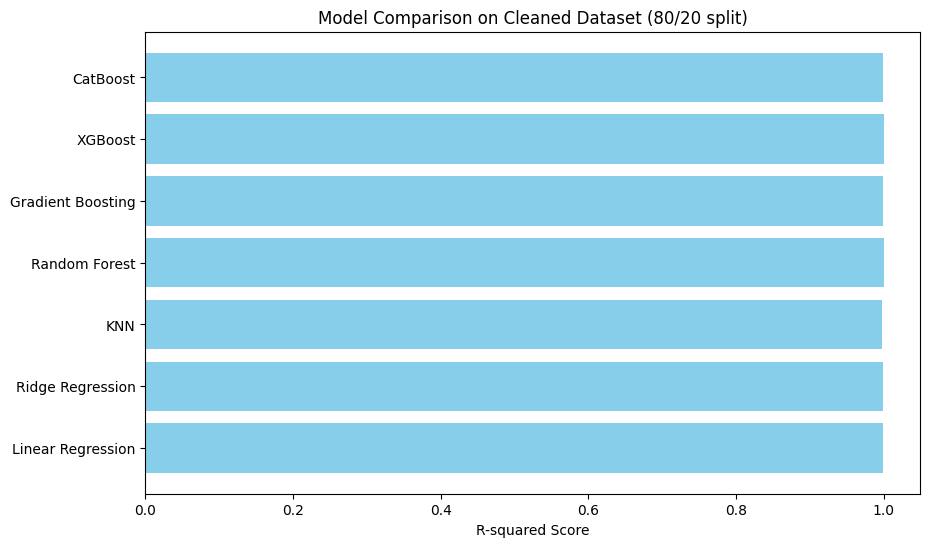

In [ ]:
# Install required libraries if not already installed
!pip install xgboost catboost scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

# ======================
# Load cleaned dataset
# ======================
df = pd.read_csv("Battery_RUL_Cleaned.csv")   # << replace with your cleaned file path

# Assuming Cycle_Index is the target (proxy for RUL)
X = df.drop(columns=["Cycle_Index"])
y = df["Cycle_Index"]

# ======================
# Train-test split (80/20)
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================
# Define models
# ======================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=500, verbosity=0),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0, iterations=500)
}

# ======================
# Train and evaluate
# ======================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

# ======================
# Results table
# ======================
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R-squared"])
print("\nPerformance Comparison (80% train / 20% test):\n")
print(results_df)

# ======================
# Visualization
# ======================
plt.figure(figsize=(10,6))
plt.barh(results_df["Model"], results_df["R-squared"], color="skyblue")
plt.xlabel("R-squared Score")
plt.title("Model Comparison on Cleaned Dataset (80/20 split)")
plt.show()


Performance Comparison (Training vs Testing):

               Model  Train MAE  Train RMSE  Train R²  Test MAE  Test RMSE  \
0  Linear Regression   4.401158    7.092128  0.999502  4.235870   6.782687   
1   Ridge Regression   4.389528    7.092718  0.999502  4.222166   6.781609   
2                KNN   5.543319    9.797285  0.999050  7.511873  14.557241   
3      Random Forest   0.728343    1.285109  0.999984  1.912663   3.397932   
4  Gradient Boosting   4.305456    6.468256  0.999586  4.555217   6.847435   
5            XGBoost   0.531381    0.697812  0.999995  1.895355   2.799260   
6           CatBoost   3.364191    4.526486  0.999797  3.791400   5.278452   

    Test R²  
0  0.999547  
1  0.999547  
2  0.997911  
3  0.999886  
4  0.999538  
5  0.999923  
6  0.999725  

✅ Performance comparison saved as 'model_performance_comparison.csv'


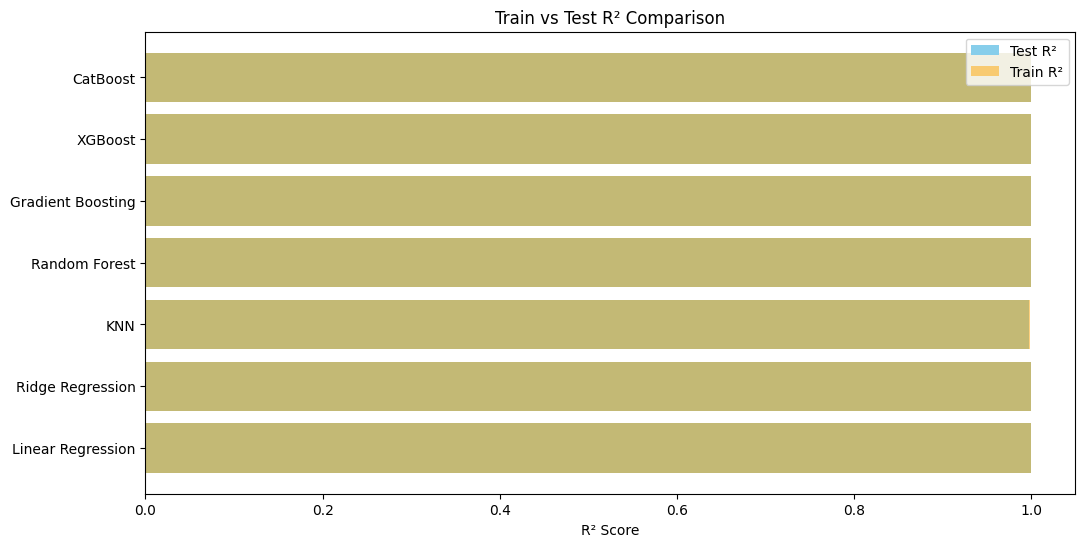

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

# ======================
# Load cleaned dataset
# ======================
df = pd.read_csv("cleaned_dataset.csv")  # cleaned dataset saved earlier

# Target for RUL prediction
X = df.drop(columns=["Cycle_Index"])
y = df["Cycle_Index"]

# Train-test split 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================
# Define models
# ======================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=500, verbosity=0),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0, iterations=500)
}

# ======================
# Train and evaluate
# ======================
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics for training
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    # Metrics for testing
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    results.append([
        name, train_mae, train_rmse, train_r2, test_mae, test_rmse, test_r2
    ])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=[
    "Model",
    "Train MAE", "Train RMSE", "Train R²",
    "Test MAE", "Test RMSE", "Test R²"
])

# ======================
# Display results
# ======================
print("\nPerformance Comparison (Training vs Testing):\n")
print(results_df)

# ======================
# Save results as CSV
# ======================
results_df.to_csv("model_performance_comparison.csv", index=False)
print("\n✅ Performance comparison saved as 'model_performance_comparison.csv'")

# ======================
# Optional: Visualization of R²
# ======================
plt.figure(figsize=(12,6))
plt.barh(results_df["Model"], results_df["Test R²"], color="skyblue", label="Test R²")
plt.barh(results_df["Model"], results_df["Train R²"], color="orange", alpha=0.5, label="Train R²")
plt.xlabel("R² Score")
plt.title("Train vs Test R² Comparison")
plt.legend()
plt.show()


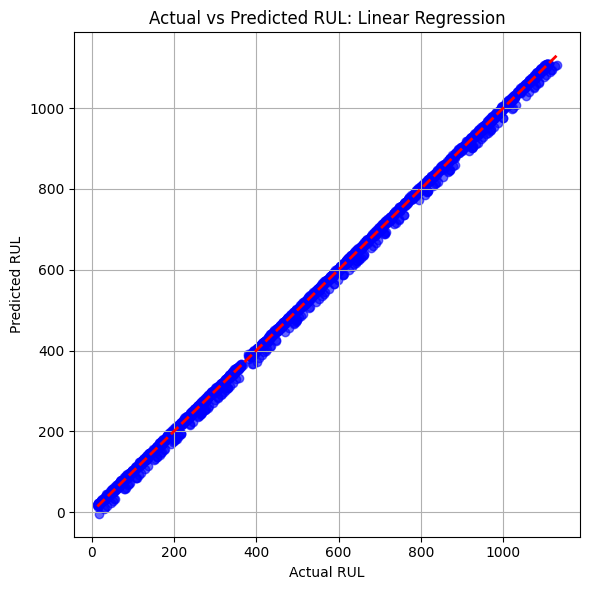

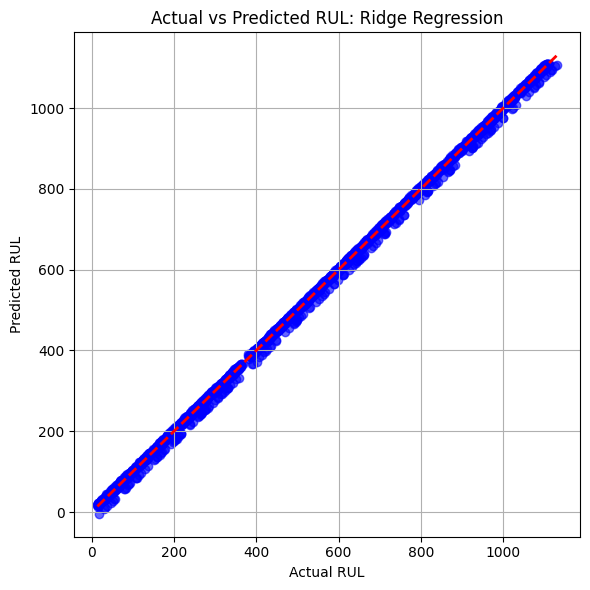

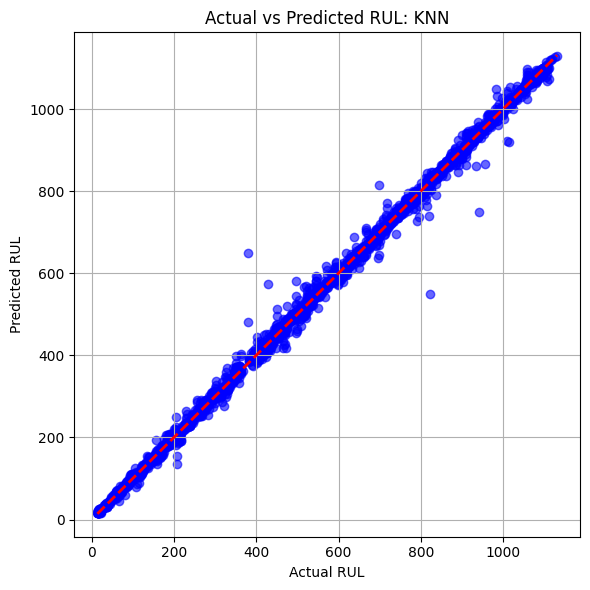

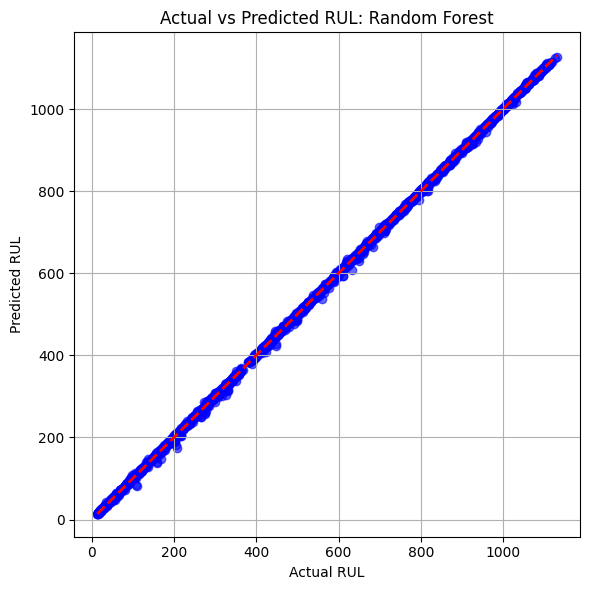

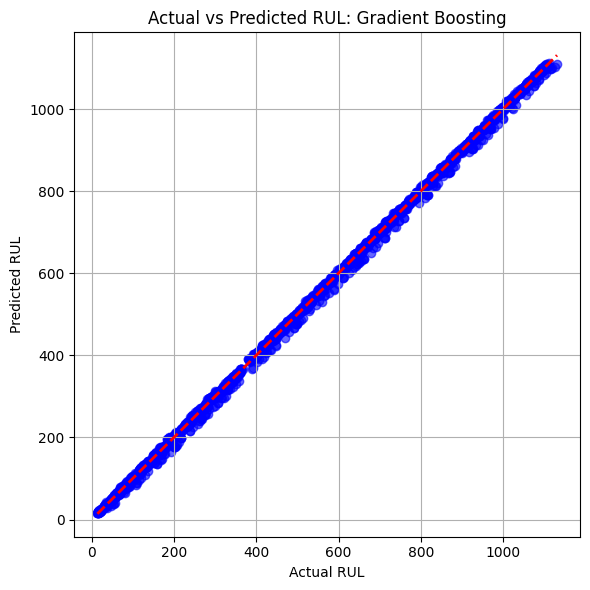

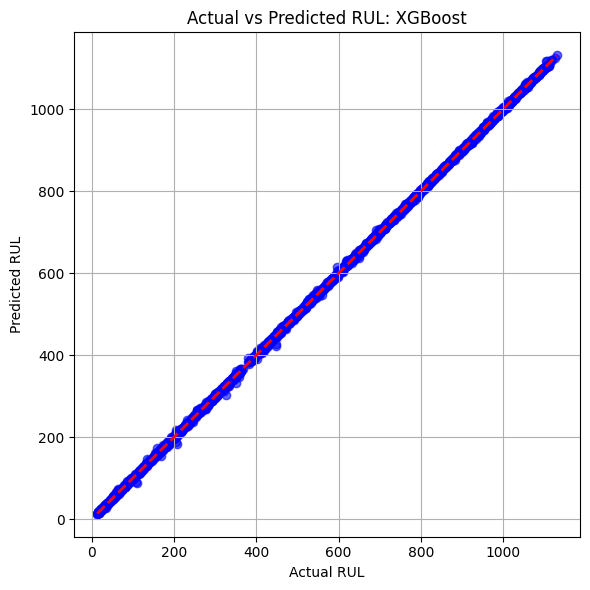

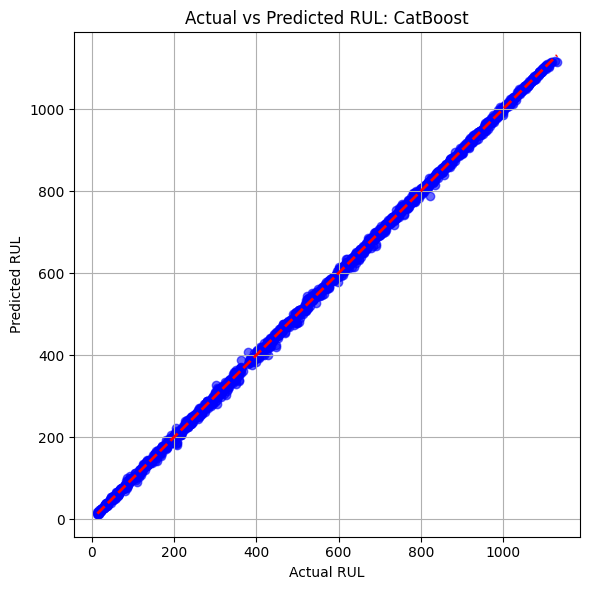

In [ ]:
import matplotlib.pyplot as plt

# Loop through models
for name, model in models.items():
    # Predict on test set
    y_test_pred = model.predict(X_test)

    # Scatter plot: Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual RUL")
    plt.ylabel("Predicted RUL")
    plt.title(f"Actual vs Predicted RUL: {name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

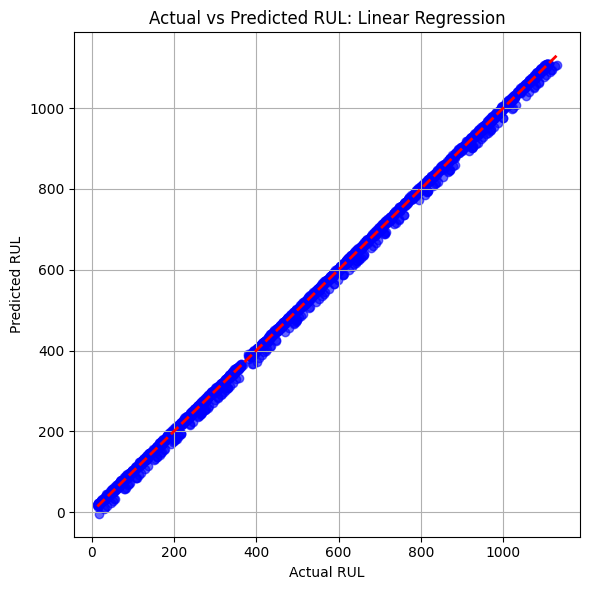

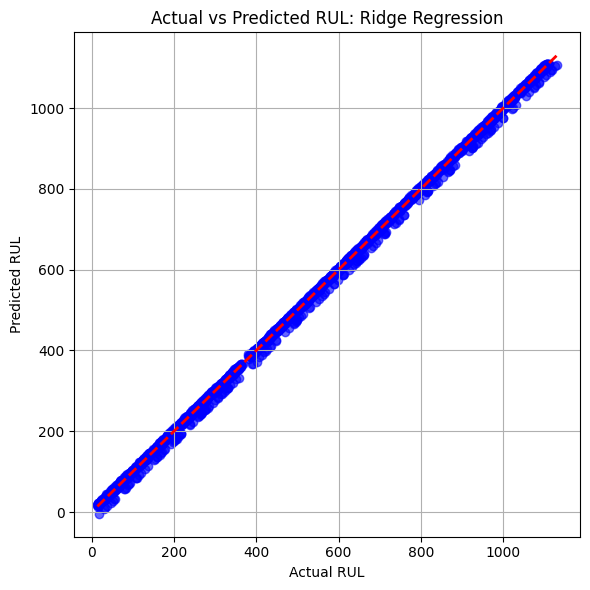

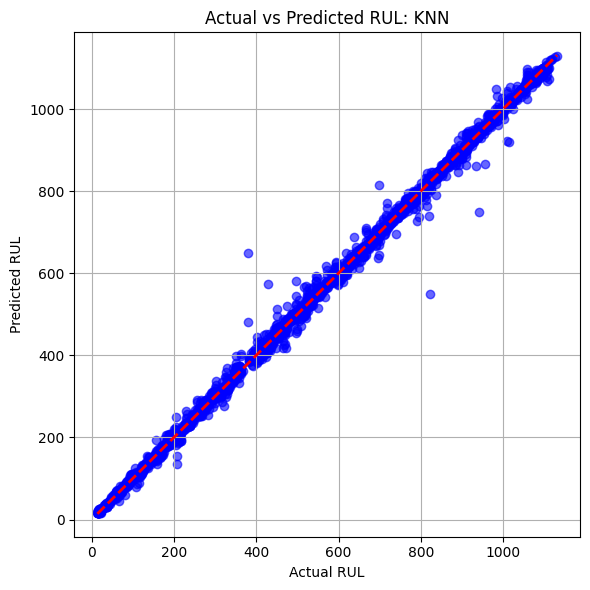

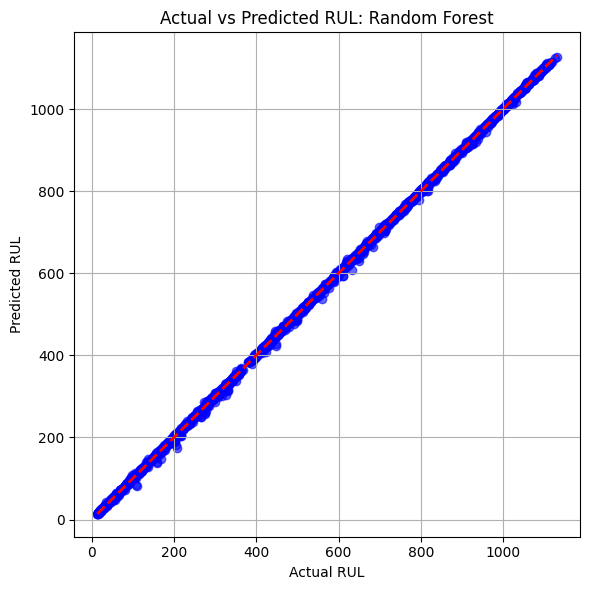

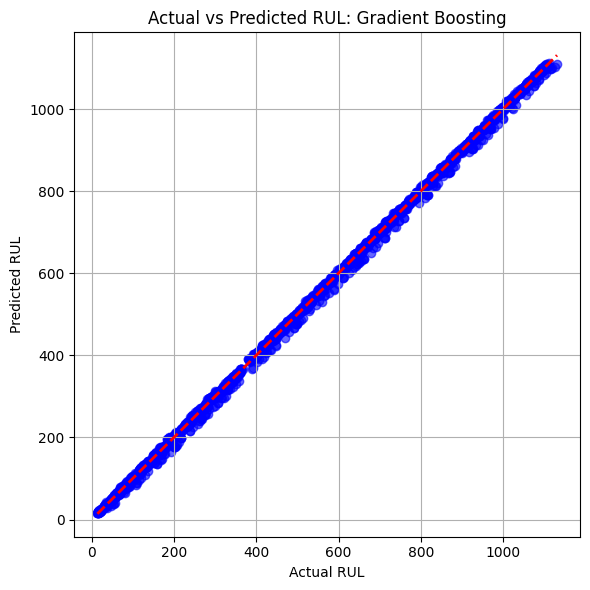

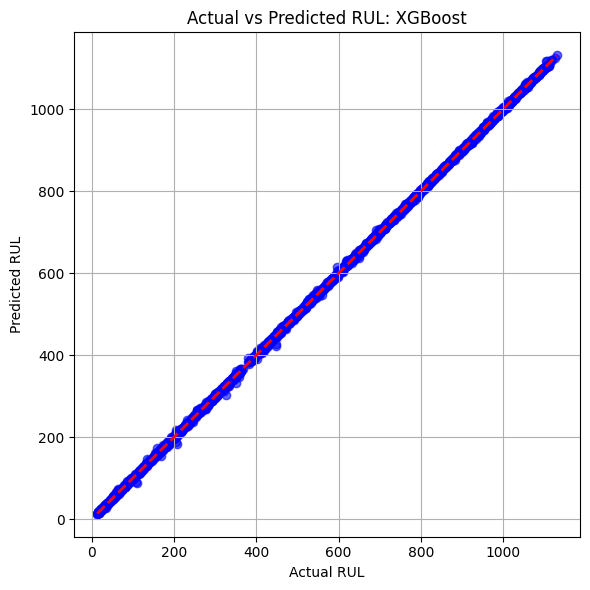

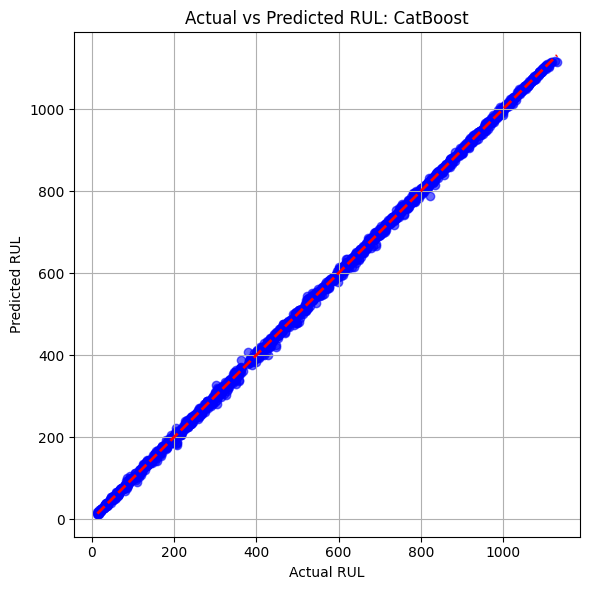

In [ ]:
import matplotlib.pyplot as plt

# Loop through models
for name, model in models.items():
    # Predict on test set
    y_test_pred = model.predict(X_test)

    # Scatter plot: Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual RUL")
    plt.ylabel("Predicted RUL")
    plt.title(f"Actual vs Predicted RUL: {name}")
    plt.grid(True)
    plt.tight_layout()

    # Display inline
    plt.show()

    # Save as TIFF file
    plt.savefig(f"scatter_actual_vs_predicted_{name.replace(' ','_')}.tiff", dpi=300, format='tiff')
    plt.close()

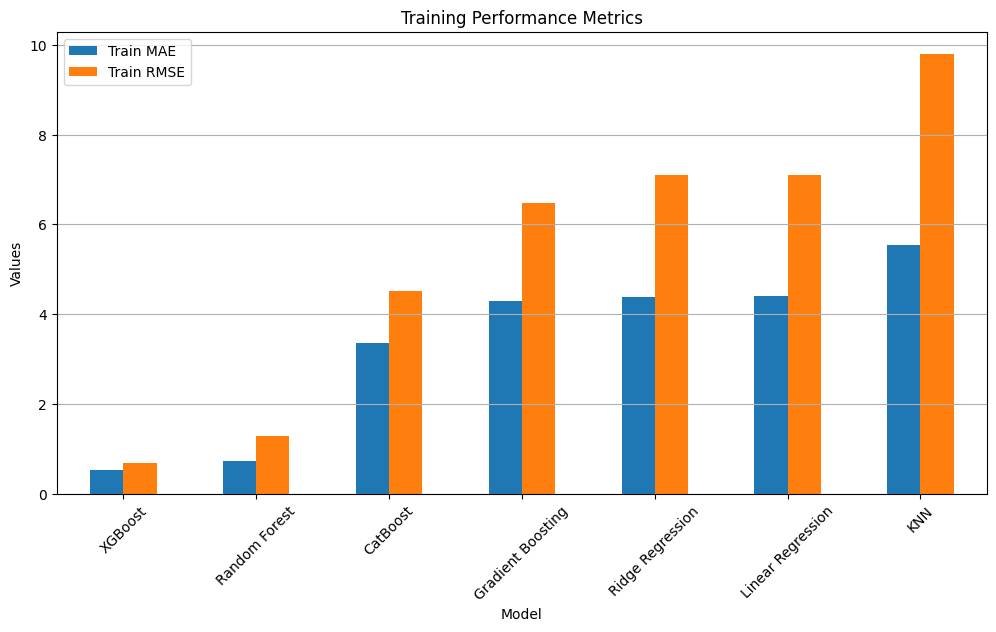

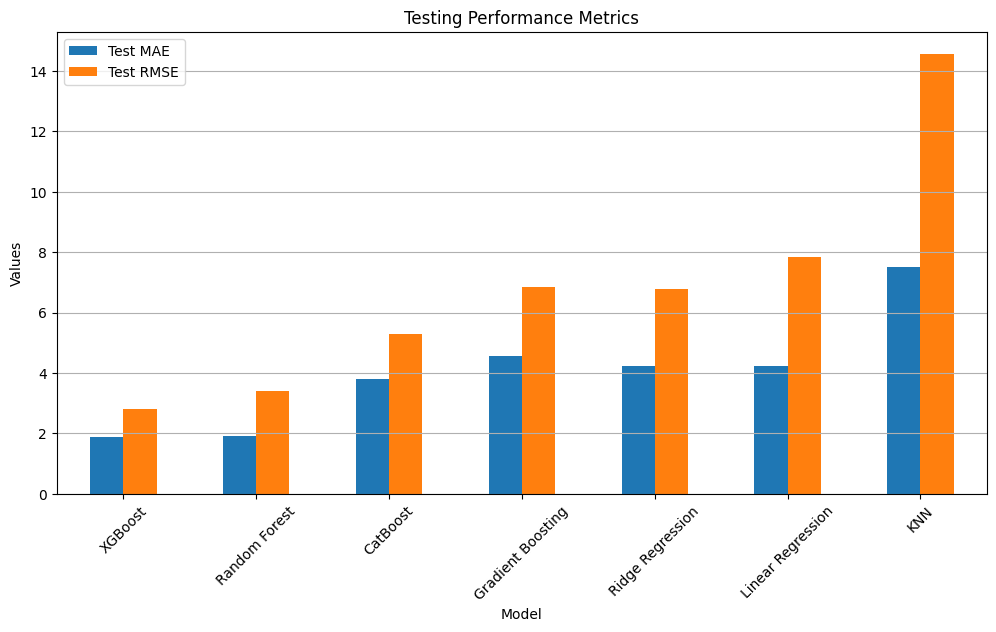

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating the DataFrame from your table
data = {
    'Model': ['XGBoost', 'Random Forest', 'CatBoost', 'Gradient Boosting', 'Ridge Regression', 'Linear Regression', 'KNN'],
    'Train MAE': [0.531381, 0.728343, 3.364191, 4.305456, 4.389528, 4.401158, 5.543319],
    'Train RMSE': [0.697812, 1.285109, 4.526486, 6.468256, 7.092718, 7.092128, 9.797285],
    'Test MAE': [1.895355, 1.912663, 3.7914, 4.555217, 4.222166, 4.23587, 7.511873],
    'Test RMSE': [2.79926, 3.397932, 5.278452, 6.847435, 6.781609, 7.82687, 14.55724],
    }

df = pd.DataFrame(data)

# Training metrics bar graph
metrics_train = ['Train MAE', 'Train RMSE']
df_train = df.set_index('Model')[metrics_train]

df_train.plot(kind='bar', figsize=(12,6))
plt.title('Training Performance Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Testing metrics bar graph
metrics_test = ['Test MAE', 'Test RMSE']
df_test = df.set_index('Model')[metrics_test]

df_test.plot(kind='bar', figsize=(12,6))
plt.title('Testing Performance Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


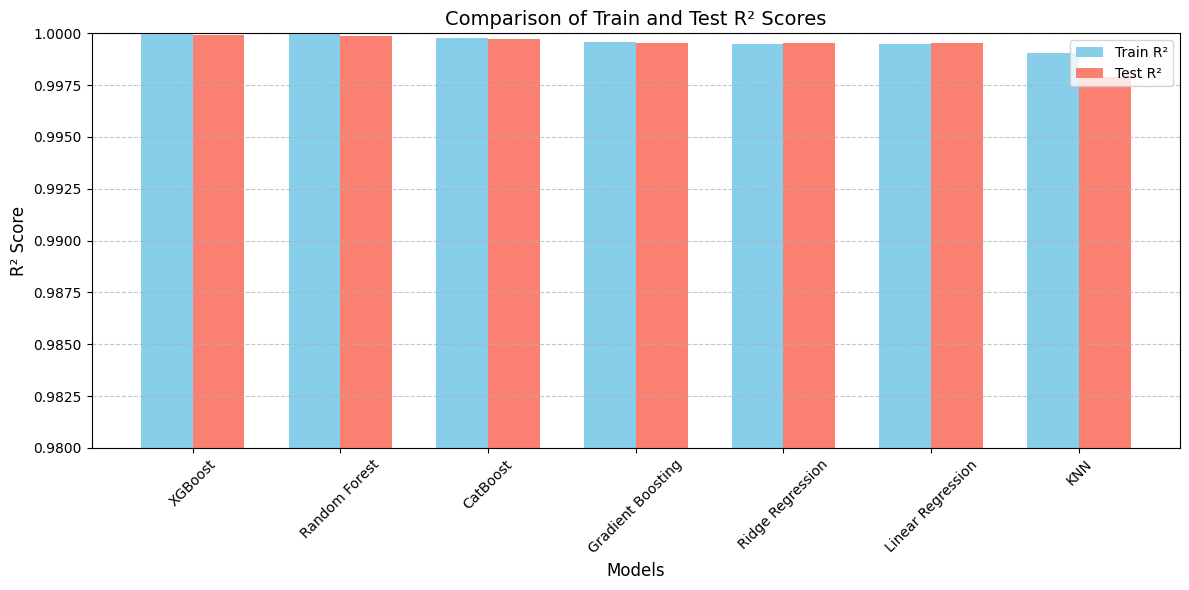

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['XGBoost', 'Random Forest', 'CatBoost', 'Gradient Boosting',
          'Ridge Regression', 'Linear Regression', 'KNN']
train_r2 = [0.999995172, 0.999983652, 0.999797178, 0.999585841, 0.999502013, 0.999502096, 0.999049825]
test_r2  = [0.999922752, 0.999886184, 0.999725346, 0.999537802, 0.999546645, 0.999546501, 0.997911037]

# Set bar width
bar_width = 0.35
x = np.arange(len(models))

# Create the figure
plt.figure(figsize=(12,6))

# Plot bars
plt.bar(x - bar_width/2, train_r2, width=bar_width, label='Train R²', color='skyblue')
plt.bar(x + bar_width/2, test_r2, width=bar_width, label='Test R²', color='salmon')

# Labels and Title
plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Comparison of Train and Test R² Scores', fontsize=14)
plt.xticks(x, models, rotation=45)
plt.ylim(0.98, 1.0)  # Scale from 0.98 to 1.0
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("Battery_RUL_Cleaned.csv")  # your cleaned dataset

# Use 'Discharge Time (s)' as proxy for capacity
initial_capacity = df['Discharge Time (s)'].iloc[0]  # first cycle as reference

# Compute SOH for each cycle
df['SOH (%)'] = (df['Discharge Time (s)'] / initial_capacity) * 100

# Display first few rows
print(df[['Cycle_Index', 'Discharge Time (s)', 'SOH (%)']].head())

# Save the dataset with SOH
df.to_csv("cleaned_dataset_with_SOH.csv", index=False)
print("\n✅ Dataset with SOH saved as 'cleaned_dataset_with_SOH.csv'")


   Cycle_Index  Discharge Time (s)     SOH (%)
0           18             2259.46  100.000000
1           19             2256.61   99.873864
2           20             2252.83   99.706567
3           21             2250.62   99.608756
4           22             2248.60   99.519354

✅ Dataset with SOH saved as 'cleaned_dataset_with_SOH.csv'


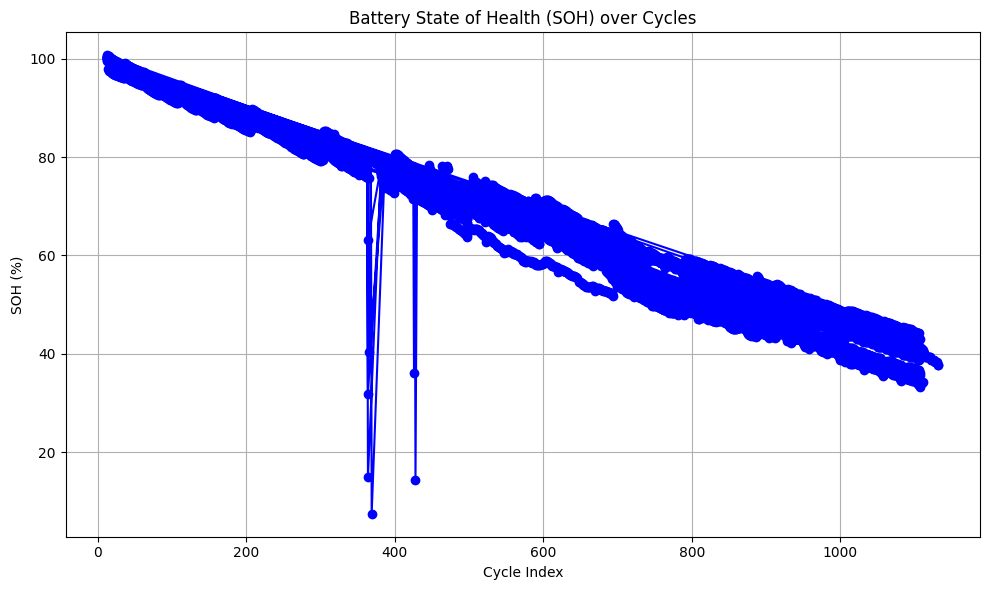


✅ SOH plot saved as 'SOH_vs_Cycle_Index.tiff'


<Figure size 640x480 with 0 Axes>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset with SOH
df = pd.read_csv("cleaned_dataset_with_SOH.csv")

# Plot SOH over cycles
plt.figure(figsize=(10,6))
plt.plot(df['Cycle_Index'], df['SOH (%)'], marker='o', linestyle='-', color='blue')
plt.xlabel("Cycle Index")
plt.ylabel("SOH (%)")
plt.title("Battery State of Health (SOH) over Cycles")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save the figure as TIFF
plt.savefig("SOH_vs_Cycle_Index.tiff", dpi=300, format='tiff')
print("\n✅ SOH plot saved as 'SOH_vs_Cycle_Index.tiff'")

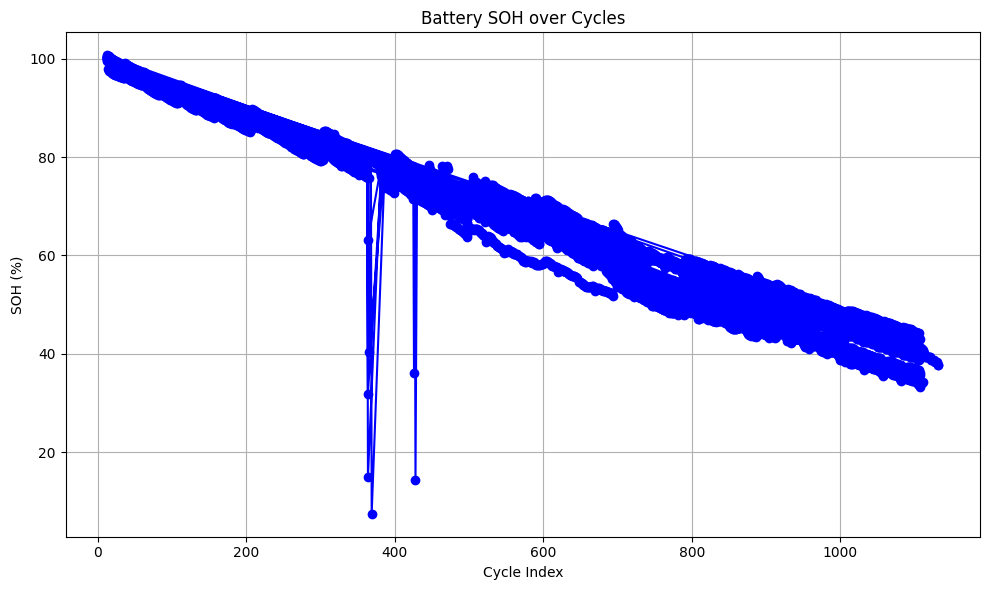

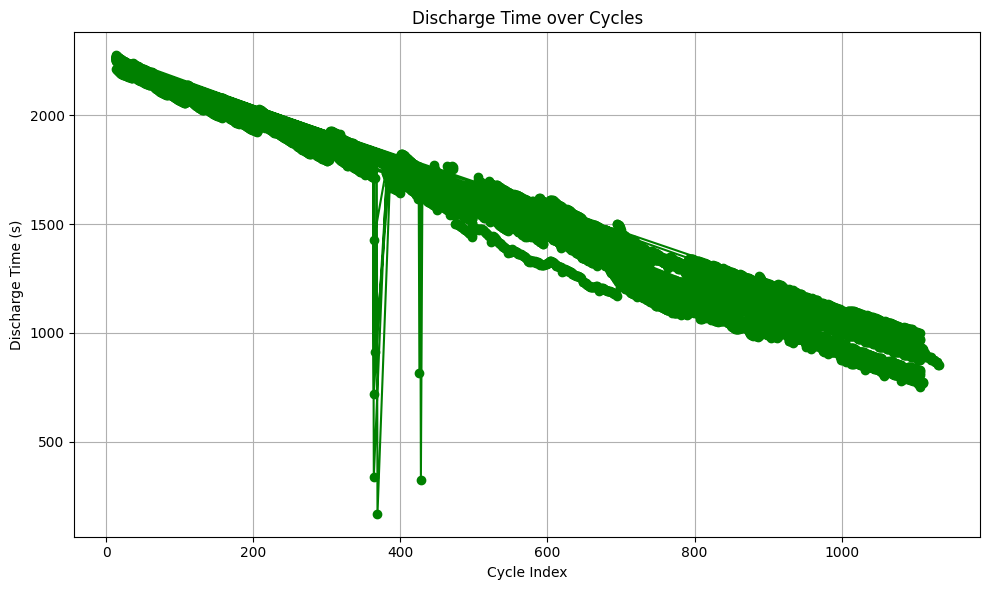

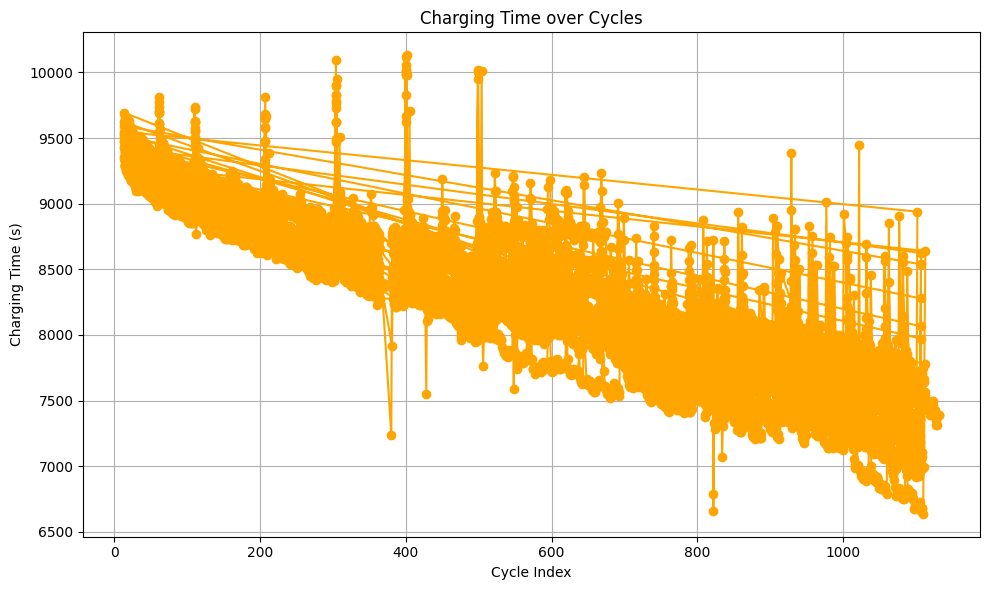

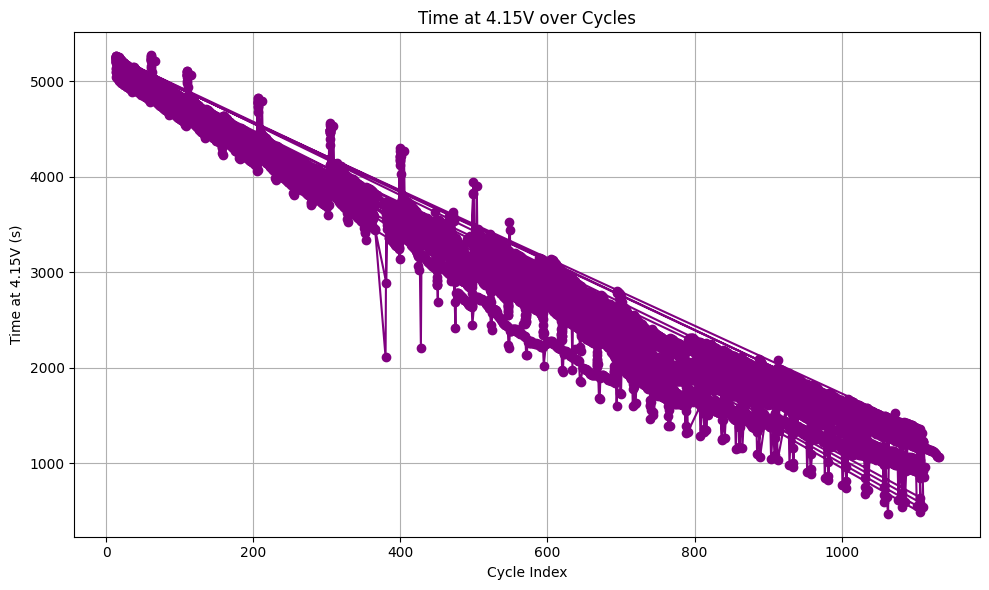

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset with SOH
df = pd.read_csv("cleaned_dataset_with_SOH.csv")

# Set cycle index for x-axis
cycles = df['Cycle_Index']

# ======================
# 1. SOH vs Cycle Index
# ======================
plt.figure(figsize=(10,6))
plt.plot(cycles, df['SOH (%)'], marker='o', linestyle='-', color='blue')
plt.xlabel("Cycle Index")
plt.ylabel("SOH (%)")
plt.title("Battery SOH over Cycles")
plt.grid(True)
plt.tight_layout()
plt.savefig("SOH_vs_Cycle_Index.tiff", dpi=300, format='tiff')
plt.show()

# ======================
# 2. Discharge Time vs Cycle Index
# ======================
plt.figure(figsize=(10,6))
plt.plot(cycles, df['Discharge Time (s)'], marker='o', linestyle='-', color='green')
plt.xlabel("Cycle Index")
plt.ylabel("Discharge Time (s)")
plt.title("Discharge Time over Cycles")
plt.grid(True)
plt.tight_layout()
plt.savefig("DischargeTime_vs_Cycle_Index.tiff", dpi=300, format='tiff')
plt.show()

# ======================
# 3. Charging Time vs Cycle Index
# ======================
plt.figure(figsize=(10,6))
plt.plot(cycles, df['Charging time (s)'], marker='o', linestyle='-', color='orange')
plt.xlabel("Cycle Index")
plt.ylabel("Charging Time (s)")
plt.title("Charging Time over Cycles")
plt.grid(True)
plt.tight_layout()
plt.savefig("ChargingTime_vs_Cycle_Index.tiff", dpi=300, format='tiff')
plt.show()

# ======================
# 4. Time at 4.15V vs Cycle Index
# ======================
plt.figure(figsize=(10,6))
plt.plot(cycles, df['Time at 4.15V (s)'], marker='o', linestyle='-', color='purple')
plt.xlabel("Cycle Index")
plt.ylabel("Time at 4.15V (s)")
plt.title("Time at 4.15V over Cycles")
plt.grid(True)
plt.tight_layout()
plt.savefig("TimeAt4.15V_vs_Cycle_Index.tiff", dpi=300, format='tiff')
plt.show()


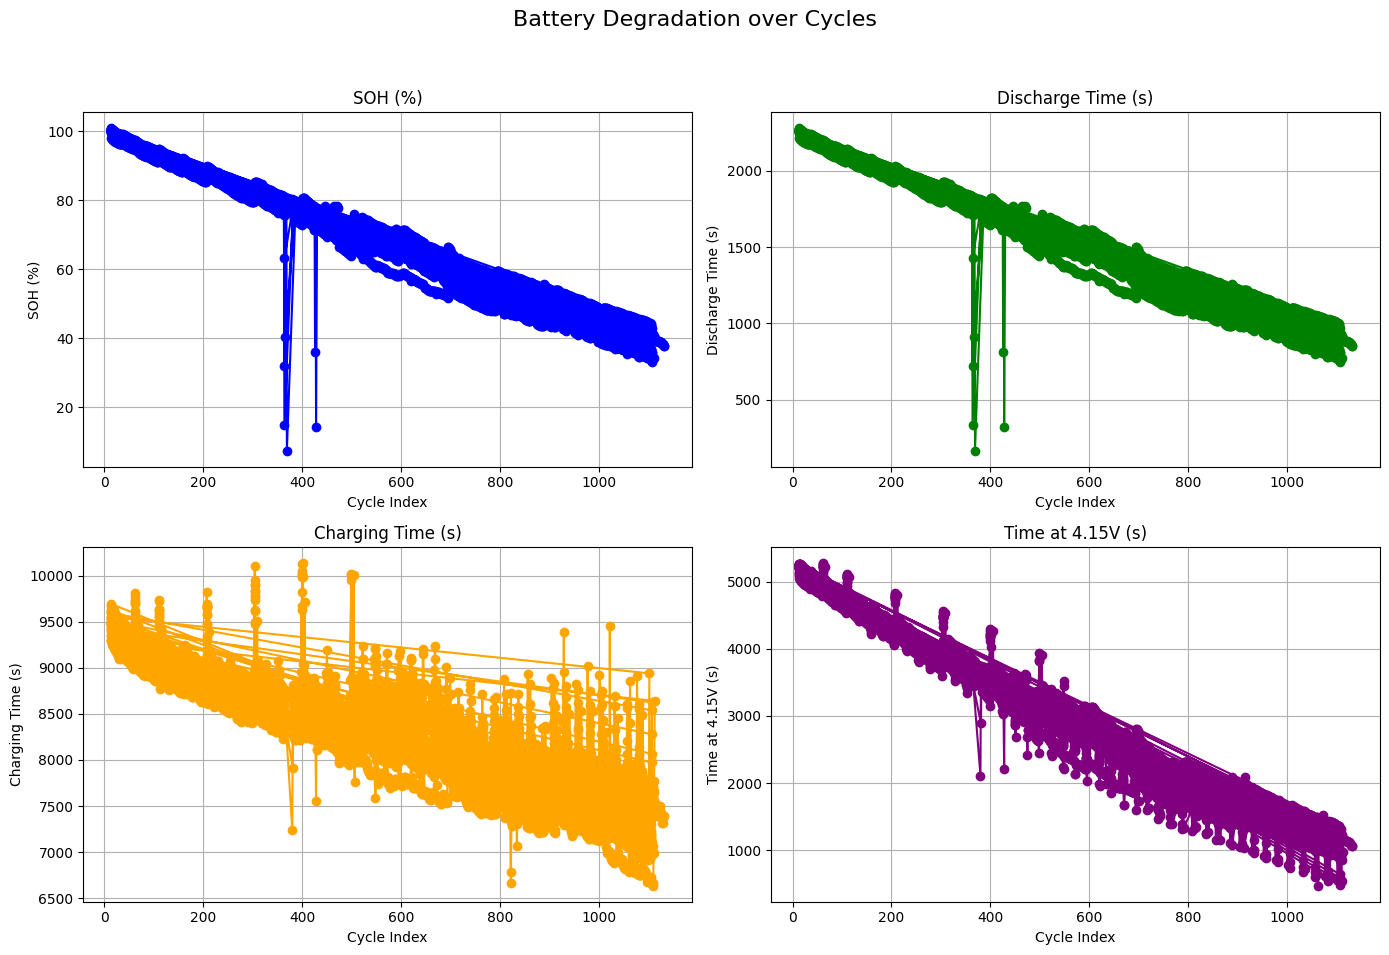


✅ Multi-panel degradation figure saved as 'Battery_Degradation_MultiPanel.tiff'


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset with SOH (can be cleaned or entire dataset)
df = pd.read_csv("cleaned_dataset_with_SOH.csv")  # replace with entire dataset if needed

cycles = df['Cycle_Index']

# ======================
# Multi-panel figure
# ======================
fig, axs = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Battery Degradation over Cycles", fontsize=16)

# 1. SOH
axs[0, 0].plot(cycles, df['SOH (%)'], marker='o', linestyle='-', color='blue')
axs[0, 0].set_title("SOH (%)")
axs[0, 0].set_xlabel("Cycle Index")
axs[0, 0].set_ylabel("SOH (%)")
axs[0, 0].grid(True)

# 2. Discharge Time
axs[0, 1].plot(cycles, df['Discharge Time (s)'], marker='o', linestyle='-', color='green')
axs[0, 1].set_title("Discharge Time (s)")
axs[0, 1].set_xlabel("Cycle Index")
axs[0, 1].set_ylabel("Discharge Time (s)")
axs[0, 1].grid(True)

# 3. Charging Time
axs[1, 0].plot(cycles, df['Charging time (s)'], marker='o', linestyle='-', color='orange')
axs[1, 0].set_title("Charging Time (s)")
axs[1, 0].set_xlabel("Cycle Index")
axs[1, 0].set_ylabel("Charging Time (s)")
axs[1, 0].grid(True)

# 4. Time at 4.15V
axs[1, 1].plot(cycles, df['Time at 4.15V (s)'], marker='o', linestyle='-', color='purple')
axs[1, 1].set_title("Time at 4.15V (s)")
axs[1, 1].set_xlabel("Cycle Index")
axs[1, 1].set_ylabel("Time at 4.15V (s)")
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the figure
plt.show()

# Save as high-resolution TIFF
fig.savefig("Battery_Degradation_MultiPanel.tiff", dpi=300, format='tiff')
print("\n✅ Multi-panel degradation figure saved as 'Battery_Degradation_MultiPanel.tiff'")


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# -------------------------------
# 1. Load cleaned dataset
df = pd.read_csv("Battery_RUL_Cleaned.csv")

# 2. Select impactful features
impactful_features = [
    "Cycle_Index",
    "Discharge Time (s)",
    "Decrement 3.6-3.4V (s)",
    "Time constant current (s)",
    "Charging time (s)",
    "Time at 4.15V (s)"
]

X = df[impactful_features]
y = df["RUL"]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 4. Define models
models = {
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=300, learning_rate=0.05, verbose=0, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# -------------------------------
# 5. Train and Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, rmse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
print(results_df)

# Save comparison table
results_df.to_csv("feature_selected_model_comparison.csv", index=False)


               Model       MAE         MSE       RMSE        R2
0            XGBoost  3.060637   22.519529   4.745475  0.999778
1      Random Forest  2.280663   16.569236   4.070533  0.999837
2           CatBoost  6.354612   72.310694   8.503570  0.999288
3  Gradient Boosting  4.200628   43.218352   6.574067  0.999574
4   Ridge Regression  4.305342   45.995108   6.781969  0.999547
5  Linear Regression  4.305342   45.995108   6.781969  0.999547
6                KNN  7.691381  214.882963  14.658887  0.997884


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# -------------------------------
# 1. Load cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

# 2. Select impactful features
impactful_features = [
    "Cycle_Index",
    "Discharge Time (s)",
    "Decrement 3.6-3.4V (s)",
    "Time constant current (s)",
    "Charging time (s)",
    "Time at 4.15V (s)"
]

X = df[impactful_features]
y = df["RUL"]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 4. Define models
models = {
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=300, learning_rate=0.05, verbose=0, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# -------------------------------
# 5. Train and Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Training performance
    y_train_pred = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Testing performance
    y_test_pred = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    results.append([
        name,
        mae_train, mse_train, rmse_train, r2_train,
        mae_test, mse_test, rmse_test, r2_test
    ])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=[
    "Model",
    "Train_MAE", "Train_MSE", "Train_RMSE", "Train_R2",
    "Test_MAE", "Test_MSE", "Test_RMSE", "Test_R2"
])

print(results_df)

# Save comparison table
results_df.to_csv("feature_selected_train_test_comparison.csv", index=False)

               Model  Train_MAE  Train_MSE  Train_RMSE  Train_R2  Test_MAE  \
0            XGBoost   2.619441  16.345156    4.042914  0.999838  3.060637   
1      Random Forest   0.867050   2.404652    1.550694  0.999976  2.280663   
2           CatBoost   6.291634  68.094722    8.251953  0.999326  6.354612   
3  Gradient Boosting   3.956157  37.594259    6.131416  0.999628  4.200628   
4   Ridge Regression   4.492154  50.370778    7.097237  0.999502  4.305342   
5  Linear Regression   4.492154  50.370778    7.097237  0.999502  4.305342   
6                KNN   5.646123  94.039062    9.697374  0.999069  7.691381   

     Test_MSE  Test_RMSE   Test_R2  
0   22.519529   4.745475  0.999778  
1   16.569236   4.070533  0.999837  
2   72.310694   8.503570  0.999288  
3   43.218352   6.574067  0.999574  
4   45.995108   6.781969  0.999547  
5   45.995108   6.781969  0.999547  
6  214.882963  14.658887  0.997884  


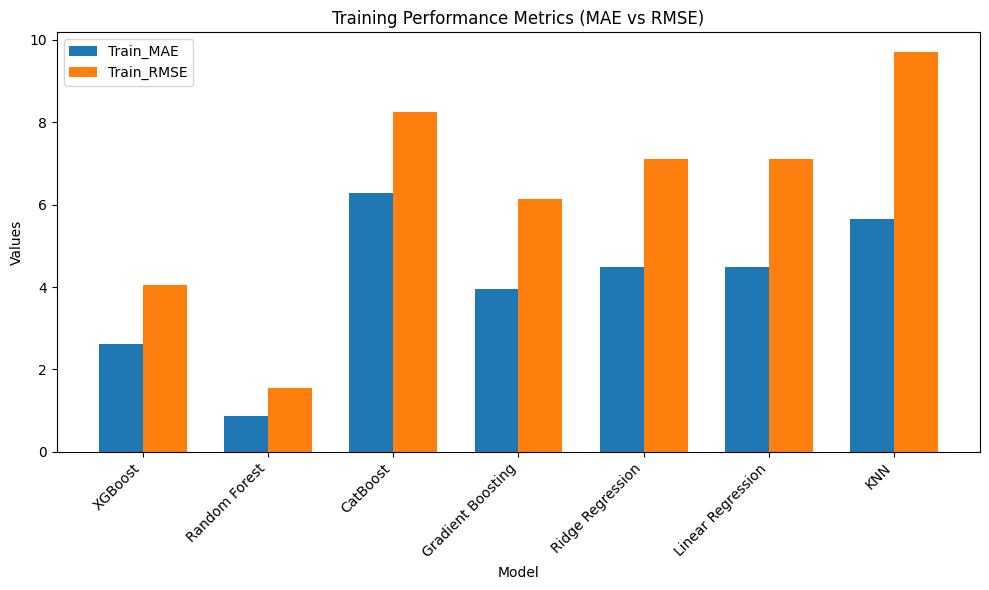

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided
data = {
    "Model": ["XGBoost", "Random Forest", "CatBoost", "Gradient Boosting",
              "Ridge Regression", "Linear Regression", "KNN"],
    "Train_MAE": [2.619440556, 0.867049729, 6.291634178, 3.956156754,
                  4.492153999, 4.492153801, 5.646123226],
    "Train_RMSE": [4.04291426, 1.550694101, 8.251952626, 6.131415702,
                   7.097237359, 7.097237359, 9.697373972]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot grouped bar chart
x = range(len(df["Model"]))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], df["Train_MAE"], width=width, label="Train_MAE")
plt.bar([i + width/2 for i in x], df["Train_RMSE"], width=width, label="Train_RMSE")

plt.xticks(x, df["Model"], rotation=45, ha="right")
plt.ylabel("Values")
plt.xlabel("Model")
plt.title("Training Performance Metrics (MAE vs RMSE)")
plt.legend()
plt.tight_layout()

# Save as TIFF (high DPI for clarity)
plt.savefig("training_metrics.tiff", format="tiff", dpi=300)

plt.show()

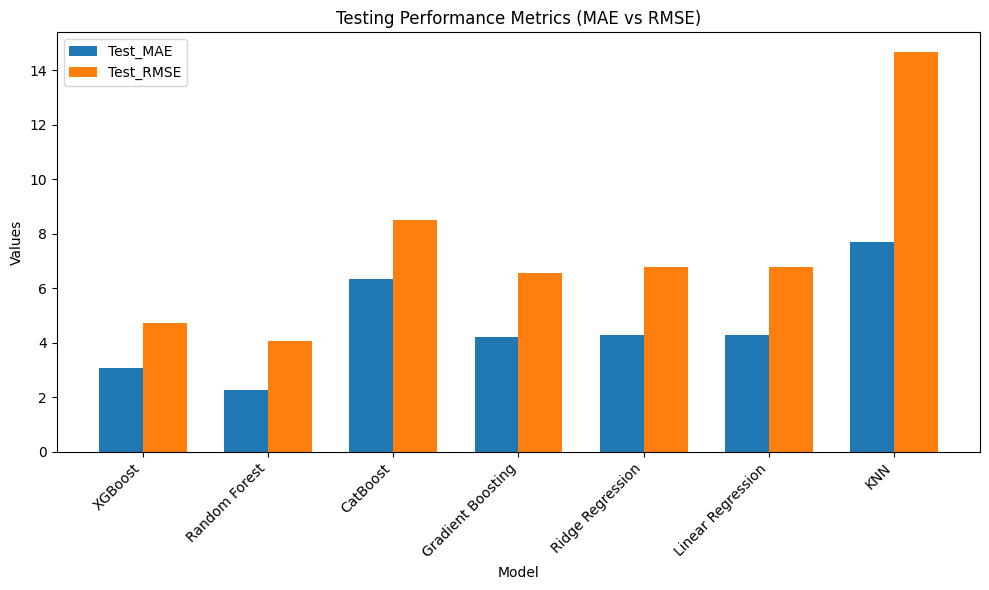

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided
data = {
    "Model": ["XGBoost", "Random Forest", "CatBoost", "Gradient Boosting",
              "Ridge Regression", "Linear Regression", "KNN"],
    "Test_MAE": [3.06063652, 2.280663436, 6.354611907, 4.200628195,
                 4.305342208, 4.305342027, 7.691381101],
    "Test_RMSE": [4.745474617, 4.070532691, 8.503569511, 6.574066613,
                  6.78196933, 6.781969317, 14.65888683]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot grouped bar chart
x = range(len(df["Model"]))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], df["Test_MAE"], width=width, label="Test_MAE")
plt.bar([i + width/2 for i in x], df["Test_RMSE"], width=width, label="Test_RMSE")

plt.xticks(x, df["Model"], rotation=45, ha="right")
plt.ylabel("Values")
plt.xlabel("Model")
plt.title("Testing Performance Metrics (MAE vs RMSE)")
plt.legend()
plt.tight_layout()

# Save as TIFF (high DPI for publication quality)
plt.savefig("testing_metrics.tiff", format="tiff", dpi=300)

plt.show()

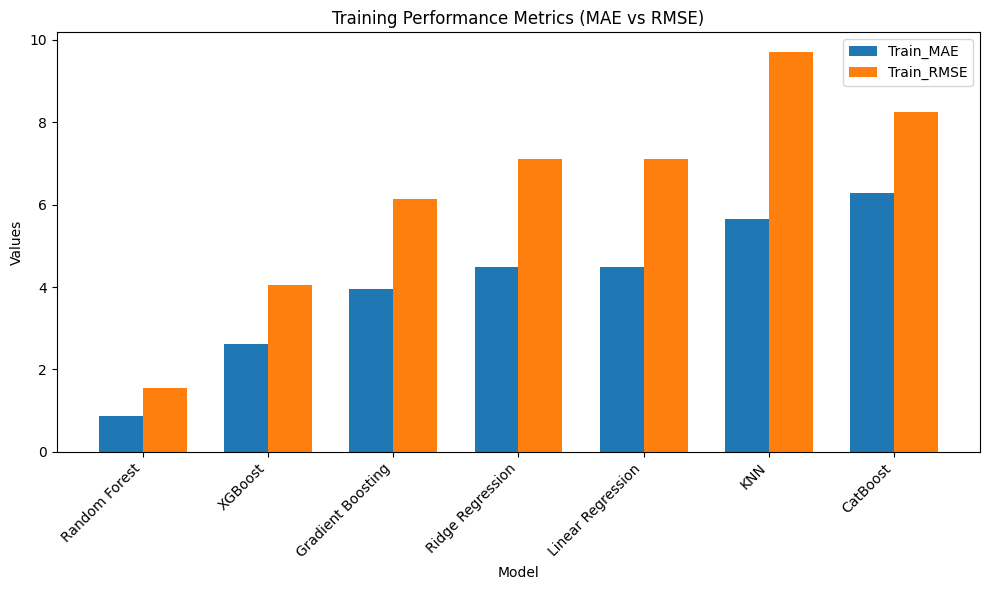

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided
data = {
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting",
              "Ridge Regression", "Linear Regression", "KNN", "CatBoost"],
    "Train_MAE": [0.867049729, 2.619440556, 3.956156754,
                  4.492153999, 4.492153801, 5.646123226, 6.291634178],
    "Train_RMSE": [1.550694101, 4.04291426, 6.131415702,
                   7.097237359, 7.097237359, 9.697373972, 8.251952626]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot grouped bar chart
x = range(len(df["Model"]))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], df["Train_MAE"], width=width, label="Train_MAE")
plt.bar([i + width/2 for i in x], df["Train_RMSE"], width=width, label="Train_RMSE")

plt.xticks(x, df["Model"], rotation=45, ha="right")
plt.ylabel("Values")
plt.xlabel("Model")
plt.title("Training Performance Metrics (MAE vs RMSE)")
plt.legend()
plt.tight_layout()

# Save as TIFF (high DPI for publication quality)
plt.savefig("train_metrics.tiff", format="tiff", dpi=300)

plt.show()

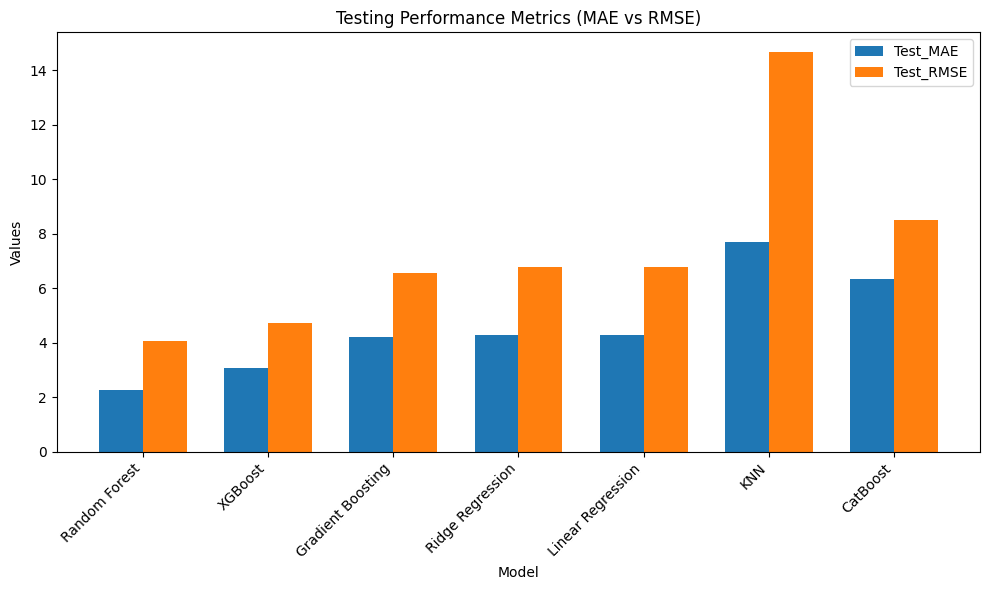

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided
data = {
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting",
              "Ridge Regression", "Linear Regression", "KNN", "CatBoost"],
    "Test_MAE": [2.280663436, 3.06063652, 4.200628195,
                 4.305342208, 4.305342027, 7.691381101, 6.354611907],
    "Test_RMSE": [4.070532691, 4.745474617, 6.574066613,
                  6.78196933, 6.781969317, 14.65888683, 8.503569511]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot grouped bar chart
x = range(len(df["Model"]))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], df["Test_MAE"], width=width, label="Test_MAE")
plt.bar([i + width/2 for i in x], df["Test_RMSE"], width=width, label="Test_RMSE")

plt.xticks(x, df["Model"], rotation=45, ha="right")
plt.ylabel("Values")
plt.xlabel("Model")
plt.title("Testing Performance Metrics (MAE vs RMSE)")
plt.legend()
plt.tight_layout()

# Save as TIFF (high DPI for publication quality)
plt.savefig("test_metrics.tiff", format="tiff", dpi=300)

plt.show()

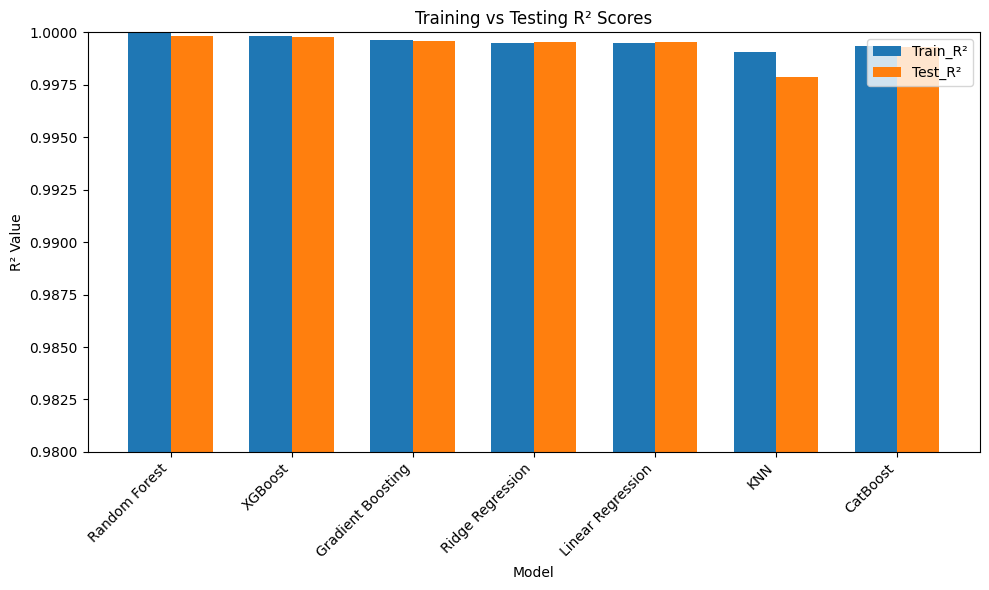

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided
data = {
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting",
              "Ridge Regression", "Linear Regression", "KNN", "CatBoost"],
    "Train_R²": [0.999976203, 0.999838233, 0.999627961,
                 0.999501523, 0.999501523, 0.999069374, 0.999326124],
    "Test_R²": [0.999836823, 0.999778211, 0.999574379,
                0.999547033, 0.999547033, 0.997883797, 0.999287872]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot grouped bar chart
x = range(len(df["Model"]))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], df["Train_R²"], width=width, label="Train_R²")
plt.bar([i + width/2 for i in x], df["Test_R²"], width=width, label="Test_R²")

plt.xticks(x, df["Model"], rotation=45, ha="right")
plt.ylabel("R² Value")
plt.xlabel("Model")
plt.title("Training vs Testing R² Scores")
plt.ylim(0.98, 1.0)   # Set scale from 0.98 to 1.0
plt.legend()
plt.tight_layout()

# Save as TIFF (high DPI for publication quality)
plt.savefig("r2_scores.tiff", format="tiff", dpi=300)

plt.show()

Feature Importance Scores (Top Features):
                           RandomForest   XGBoost   CatBoost
Cycle_Index                    0.999545  0.997696  51.923060
Max. Voltage Dischar. (V)      0.000097  0.000153   3.611547
Min. Voltage Charg. (V)        0.000072  0.000098   2.307615
Charging time (s)              0.000070  0.000144   1.434218
Decrement 3.6-3.4V (s)         0.000066  0.000178   4.380711
Discharge Time (s)             0.000060  0.001491  11.799421
Time at 4.15V (s)              0.000057  0.000177  10.295887
Time constant current (s)      0.000033  0.000061  14.247539


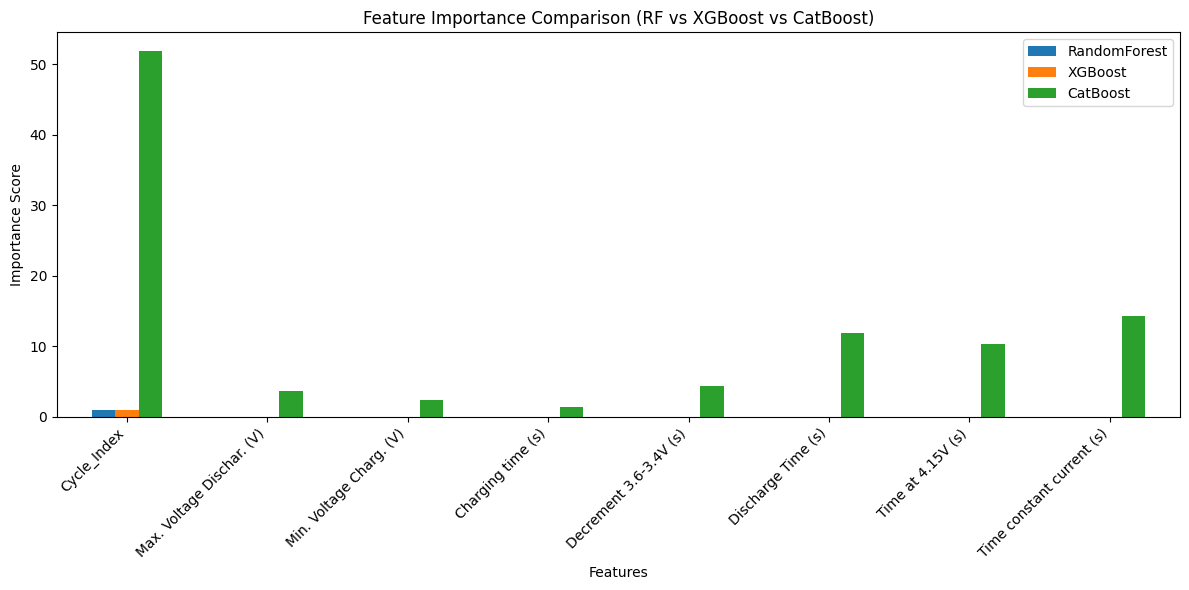

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

# ------------------------------
# Load dataset (already uploaded earlier)
# ------------------------------
# Example if saved locally:
df = pd.read_csv("Battery_RUL_Cleaned.csv")

# Define features (all except target) and target
X = df.drop(columns=["RUL"])   # RUL = Remaining Useful Life (target)
y = df["RUL"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 1. Random Forest Feature Importance
# ------------------------------
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# ------------------------------
# 2. XGBoost Feature Importance
# ------------------------------
xgb_model = xgb.XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

# ------------------------------
# 3. CatBoost Feature Importance
# ------------------------------
cat_model = CatBoostRegressor(iterations=300, learning_rate=0.05, depth=6,
                              random_state=42, verbose=0)
cat_model.fit(X_train, y_train)
cat_importances = pd.Series(cat_model.feature_importances_, index=X.columns)

# ------------------------------
# Combine into one DataFrame
# ------------------------------
feature_importances = pd.DataFrame({
    "RandomForest": rf_importances,
    "XGBoost": xgb_importances,
    "CatBoost": cat_importances
}).sort_values(by="RandomForest", ascending=False)

print("Feature Importance Scores (Top Features):")
print(feature_importances)

# ------------------------------
# Plot comparison
# ------------------------------
feature_importances.plot(kind="bar", figsize=(12,6))
plt.title("Feature Importance Comparison (RF vs XGBoost vs CatBoost)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("feature_importance_comparison.tiff", format="tiff", dpi=300)
plt.show()